In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()
os.chdir('..')

In [3]:
from dataset.dataloader import Dataloader

In [4]:
data = Dataloader(
    listing_path = f'dataset/listings',
    comments_path = f'dataset/comments',
)
original_df = data.getListings().sample(1000)
df = original_df.copy()

In [5]:
# Crate a list for removing unnecessary columns from the dataset
ignored_conlumns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source','picture_url', 'host_id',
       'host_url','host_name','host_location','host_thumbnail_url', 'host_picture_url','host_verifications','neighbourhood_group_cleansed','latitude',
       'longitude','bathrooms','calendar_updated','has_availability','availability_30', 'availability_60', 'availability_90',
       'availability_365','calendar_last_scraped','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','instant_bookable',
       'calculated_host_listings_count','license']

columns_to_remove = ignored_conlumns

In [6]:
# Remove the unnecessary columns from the dataset.
df.drop(columns_to_remove, axis=1, inplace=True)
len(df.columns)

41

In [7]:
df

,name,description,neighborhood_overview,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3864,"Spacious (92sqm), comfy & ☀️Duplex in Oosterpa...",The apartment is ideal for those who want to h...,The apartment is located in the upcoming neigh...,2013-10-23,(French below)\n\nHi there!\nI’m Gilles. I’m b...,NaN,NaN,50%,f,NaN,...,4.0,16,6,0,2019-11-24,2022-05-13,1,0,0,0.40
608,"Bright appartment in the 9 streets, w/balcony",Be welcome in this bright 60m2 appartment in t...,NaN,2014-08-17,NaN,within a few hours,100%,0%,f,Grachtengordel,...,1125.0,34,0,0,2014-11-03,2020-07-30,1,0,0,0.33
5195,Cosy 1 bedroom Apartment by Canal,The apartment has just been fully renovated an...,NaN,2016-01-24,"Hi there,\n\nWelcome to my humble home that I ...",within a few hours,100%,73%,t,NaN,...,30.0,11,11,0,2022-03-27,2023-02-04,1,0,0,0.95
485,Private studio with own bathroom&terrace,We are located on the Prinsengracht canal in t...,++ Location! :) It's one of the most authentic...,2011-12-17,Hi everyone! We are Chris & Lenny and together...,within an hour,100%,99%,t,Grachtengordel,...,1125.0,161,87,2,2014-04-21,2023-02-25,0,1,0,1.49
1830,Luxurious apartment in trendy neigbourhood,"Perfect spot in Amsterdams best neigbourhood, ...",NaN,2013-10-29,NaN,within a few hours,67%,58%,f,De Pijp,...,30.0,27,8,1,2017-02-19,2023-02-18,1,0,0,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945,211 - Sluis Haveneiland,If you are looking for a hotel room with a vie...,Consisting of multiple artificial islands that...,2018-07-20,SWEETS hotel is a one-of-a-kind hotel located ...,within an hour,100%,99%,t,Hoofddorppleinbuurt,...,7.0,8,1,0,2019-05-23,2022-10-13,4,12,0,0.17
4663,150sqm central family apartment with roof terrace,Located in the lively and central district of ...,The Pijp is a very lively area with lots of li...,2014-01-18,"French family settled in Amsterdam since 2006,...",within a day,100%,86%,f,NaN,...,1125.0,10,6,0,2021-08-12,2023-01-02,1,0,0,0.52
3868,Amazing canal-view house in city-center!,Enjoy your own private room in our cozy apartm...,The apartment is at a unique central location ...,2016-08-25,I’m Tanvi and I’ve been living in Amsterdam fo...,NaN,NaN,NaN,f,Jordaan,...,1125.0,1,0,0,2020-02-17,2020-02-17,2,0,0,0.03
950,Canal View Loft,Five windows overlooking the most beautiful ca...,H401 is situated at a historic canal district ...,2014-03-17,H401 is the name of a 17th century canal house...,within a few hours,100%,88%,t,Grachtengordel,...,180.0,101,11,0,2015-06-21,2022-11-25,2,0,0,1.07


# Basic analysis

In [8]:
df.head()

,name,description,neighborhood_overview,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3864,"Spacious (92sqm), comfy & ☀️Duplex in Oosterpa...",The apartment is ideal for those who want to h...,The apartment is located in the upcoming neigh...,2013-10-23,(French below)\n\nHi there!\nI’m Gilles. I’m b...,NaN,NaN,50%,f,NaN,...,4.0,16,6,0,2019-11-24,2022-05-13,1,0,0,0.40
608,"Bright appartment in the 9 streets, w/balcony",Be welcome in this bright 60m2 appartment in t...,NaN,2014-08-17,NaN,within a few hours,100%,0%,f,Grachtengordel,...,1125.0,34,0,0,2014-11-03,2020-07-30,1,0,0,0.33
5195,Cosy 1 bedroom Apartment by Canal,The apartment has just been fully renovated an...,NaN,2016-01-24,"Hi there,\n\nWelcome to my humble home that I ...",within a few hours,100%,73%,t,NaN,...,30.0,11,11,0,2022-03-27,2023-02-04,1,0,0,0.95
485,Private studio with own bathroom&terrace,We are located on the Prinsengracht canal in t...,++ Location! :) It's one of the most authentic...,2011-12-17,Hi everyone! We are Chris & Lenny and together...,within an hour,100%,99%,t,Grachtengordel,...,1125.0,161,87,2,2014-04-21,2023-02-25,0,1,0,1.49
1830,Luxurious apartment in trendy neigbourhood,"Perfect spot in Amsterdams best neigbourhood, ...",NaN,2013-10-29,NaN,within a few hours,67%,58%,f,De Pijp,...,30.0,27,8,1,2017-02-19,2023-02-18,1,0,0,0.37


In [9]:
df.shape

(1000, 41)

In [10]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_since                                       object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_neighbourhood                               object
host_listings_count                               int64
host_total_listings_count                         int64
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                           object
property_type                                    object
room_type                                       

In [11]:
df.isnull().sum()

name                                              0
description                                       0
neighborhood_overview                           368
host_since                                        0
host_about                                      413
host_response_time                              281
host_response_rate                              281
host_acceptance_rate                            144
host_is_superhost                                 0
host_neighbourhood                              564
host_listings_count                               0
host_total_listings_count                         0
host_has_profile_pic                              0
host_identity_verified                            0
neighbourhood                                   368
neighbourhood_cleansed                            0
property_type                                     0
room_type                                         0
accommodates                                      0
bathrooms_te

In [12]:
df.describe()

,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1000.000000,1000.000000,1000.000000,959.000000,993.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,890.000000
mean,2.654000,6.556000,2.882000,1.538060,1.821752,3.711000,428.609000,3.515000,4.406000,543.970000,569.22900,3.926300,564.689400,49.702000,12.435000,0.767000,1.102000,0.720000,0.030000,1.147360
std,11.957059,37.508396,1.312936,0.881473,1.351317,8.201265,490.695829,8.183076,10.586559,518.779666,518.72634,8.658571,516.349486,104.635854,32.894708,2.106454,1.631643,1.939423,0.373148,2.256134
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,21.000000,2.000000,2.000000,28.000000,30.00000,2.000000,30.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.270000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,91.000000,2.000000,3.000000,365.000000,365.00000,3.000000,365.000000,11.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.555000
75%,2.000000,3.000000,4.000000,2.000000,2.000000,3.250000,1125.000000,3.000000,4.000000,1125.000000,1125.00000,4.000000,1125.000000,43.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.150000
max,355.000000,533.000000,16.000000,8.000000,18.000000,183.000000,1825.000000,183.000000,200.000000,1825.000000,1825.00000,183.000000,1825.000000,1096.000000,800.000000,41.000000,14.000000,20.000000,8.000000,53.750000


Distribution of a numeric columns using a histogram

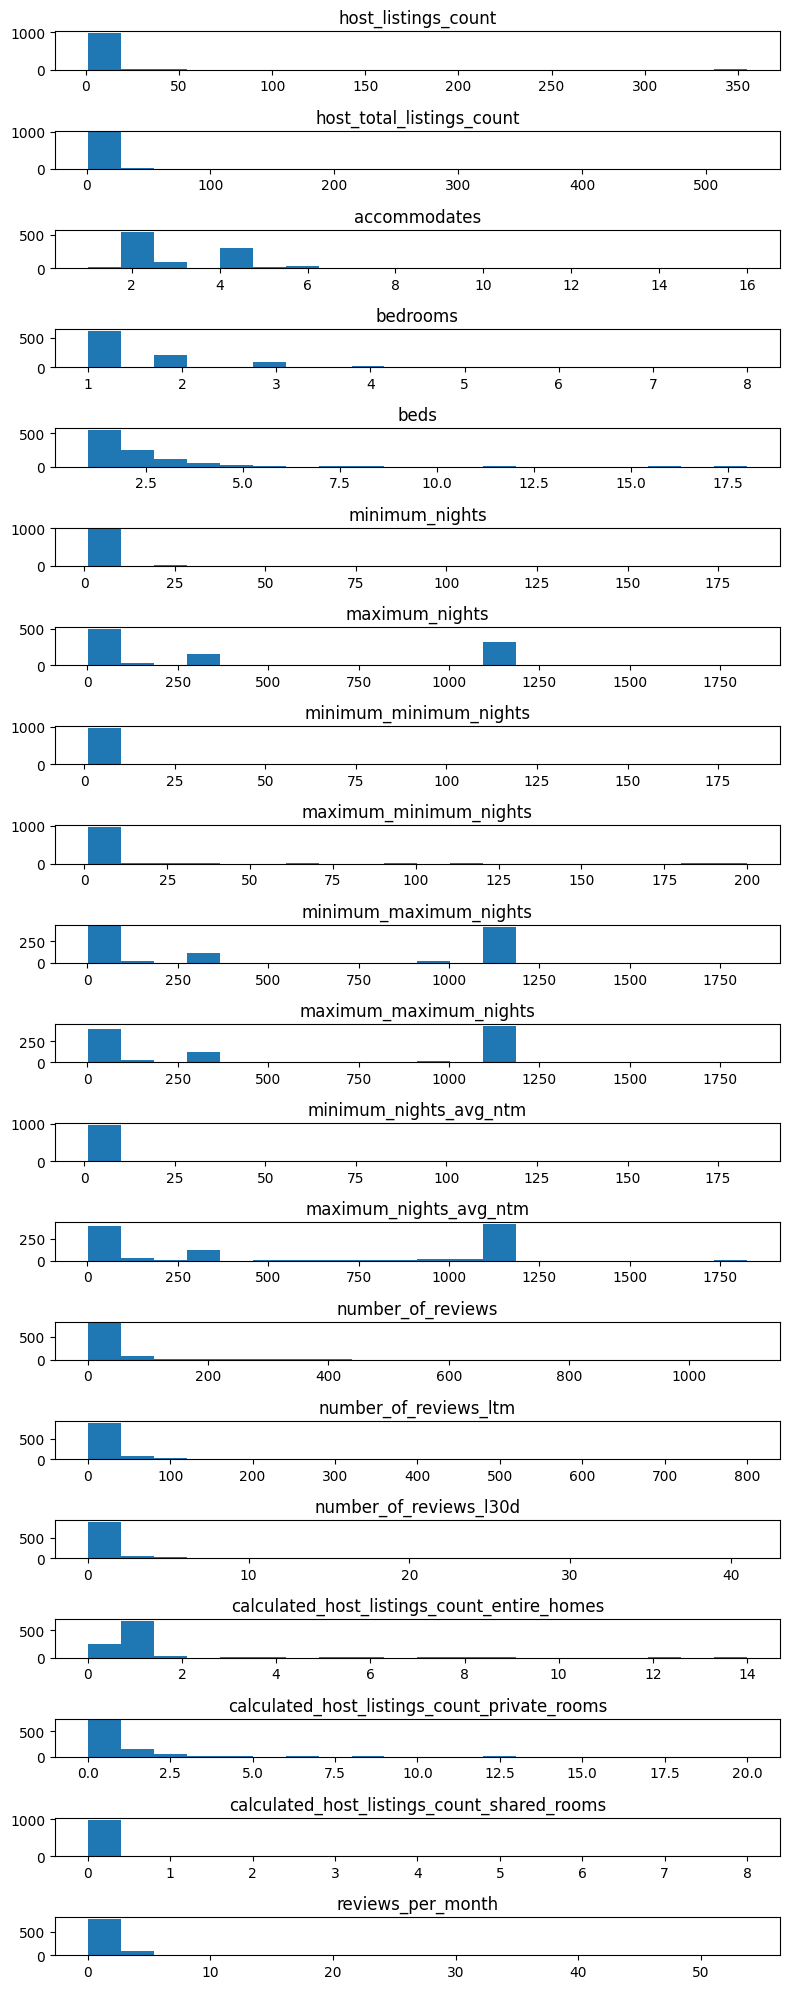

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 20))

# Loop through each column and plot a histogram
for i, col in enumerate(numerical_cols):
    data = df[col].dropna()  # Remove missing values from the data
    axes[i].hist(data, bins=20)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Relationship between a couple columns using a scatter plot:

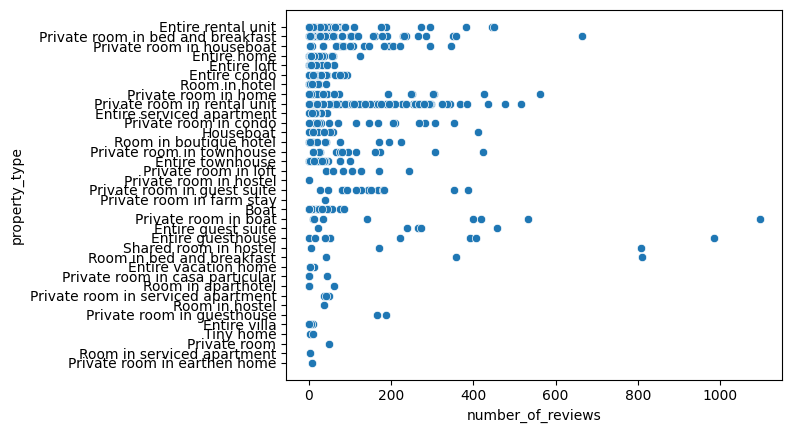

In [14]:
sns.scatterplot(data=df, x='number_of_reviews', y='property_type')
plt.show()

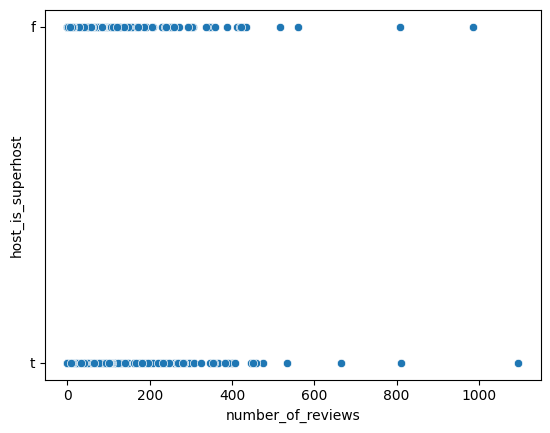

In [15]:
sns.scatterplot(data=df, x='number_of_reviews', y='host_is_superhost')
plt.show()

# Sentiment check

In [16]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to compute sentiment polarity
def compute_sentiment(text):
    blob = TextBlob(str(text))
    return blob.sentiment.polarity

# Iterate over each column in the DataFrame
for column in df.columns:
    # Compute sentiment polarity for each cell in the column
    df[column + '_sentiment'] = df[column].apply(compute_sentiment)

    # Check if the minimum and maximum sentiment polarity values for the column are both non-zero
    if df[column + '_sentiment'].min() != 0 or df[column + '_sentiment'].max() != 0:
        # Create text box plot for the sentiment polarity of the column
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.boxplot(data=df, y=column + '_sentiment', ax=ax)
        ax.set_title(f'{column} Sentiment Polarity Box Plot')
        ax.set_ylabel('Sentiment Polarity')
        plt.show()


ModuleNotFoundError: No module named 'textblob'

# Word clouds

In [ ]:
# Pre-Processing Functions
import nltk
import itertools
import string
import re
from collections import Counter
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
from nltk.stem import PorterStemmer
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import json

nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from tqdm import tqdm

# The amenities are a list of smal descriptions, as such first we have to tokenize them then i will generate a sngle array with all the dscrioom on the documents
def tokenize_textColumn(column):
    tokens_list = []
    for a in column:
        # Check if the value is a string or can be converted to a string
        if isinstance(a, str):
            # Tokenize the text into individual words or units
            tokens = word_tokenize(uncontract(a))
            for token in tokens:
                if token not in tokens_list:
                    tokens_list.append(token)
    return tokens_list


# Uncontract contracted forms
def uncontract(text):    
  text = re.sub(r"(\b)([Aa]re|[Cc]ould|[Dd]id|[Dd]oes|[Dd]o|[Hh]ad|[Hh]as|[Hh]ave|[Ii]s|[Mm]ight|[Mm]ust|[Ss]hould|[Ww]ere|[Ww]ould)n't", r"\1\2 not", text)
  text = re.sub(r"(\b)([Hh]e|[Ii]|[Ss]he|[Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Yy]ou)'ll", r"\1\2 will", text)
  text = re.sub(r"(\b)([Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Yy]ou)'re", r"\1\2 are", text)
  text = re.sub(r"(\b)([Ii]|[Ss]hould|[Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Ww]ould|[Yy]ou)'ve", r"\1\2 have", text)
  
  text = re.sub(r"(\b)([Cc]a)n't", r"\1\2n not", text)
  text = re.sub(r"(\b)([Ii])'m", r"\1\2 am", text)
  text = re.sub(r"(\b)([Ll]et)'s", r"\1\2 us", text)
  text = re.sub(r"(\b)([Tt]here)'s", r"\1\2 is", text)
  text = re.sub(r"(\b)([Ww])on't", r"\1\2ill not", text)
  text = re.sub(r"(\b)([Ss])han't", r"\1\2hall not", text)
  text = re.sub(r"(\b)([Yy])(?:'all|a'll)", r"\1\2ou all", text)
  text = text.replace('"', " ") # Removes " Characters
  
  return text

# Given an original token list return an valutation function to compare against it
def gen_dimensionality_info(orignial_tokens, name):
  orignial_tokens = list(itertools.chain.from_iterable(orignial_tokens))
  def dimensionality_info(token_list):
    token_list = list(itertools.chain.from_iterable(list(itertools.chain.from_iterable(token_list))))
    print(f'Number of {name} Tokens:               ', len(token_list), '/', len(orignial_tokens))
    print(f'Unique {name} Tokens:                  ', len(set(token_list)), '/', len(set(orignial_tokens)))
    print()
    print('Reduction pecentage:            ', 1-(len(token_list) / len(orignial_tokens)))
    print('Reduction pecentage Unique:     ', 1-(len(set(token_list)) / len(set(orignial_tokens))))
    print()
    print('Most Common of current filter:')
    for t, f in Counter(token_list).most_common(10): print('{0:25} {1}'.format(t, f))
    print('################################################################')
    print()
  
  return dimensionality_info

# Remove all the punctuation only tokens
def remove_puctuation_only_token(tokens):
  return list(filter(lambda t: not all(c in string.punctuation for c in t), tokens))

# Remove Numbers
def remove_numbers(tokens):
  #return list(filter(lambda t: not t.isnumeric() , tokens))
  return [token for token in tokens if not token.isnumeric()]

def remove_url(tokens):
    url_regex_1 = r'^https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&\/=]*)$'
    url_regex_2 = r'^[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&\/=]*)$'
    url_regex_1 = re.compile(url_regex_1)
    url_regex_2 = re.compile(url_regex_2)
    val = [string for string in tokens if not url_regex_1.match(string) and not url_regex_2.match(string)]
    return val
# remove the stop words from the tokens
def remove_stop_words(tokens):
  stop_word_regex = '|'.join(['^{}$'.format(s) for s in stopwords.words('english')])
  stop_word_regex = re.compile(stop_word_regex)
  return list(filter(lambda t: not stop_word_regex.match(t), tokens))

nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize(tokens):
   
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(t) for t in tokens]

# Lowercase the text
def lowercase(tokens): 
  return [t.lower() for t in tokens]

# Remove the the tokens made only by ’
def remove_special_tokens(tokens): 
  return [t for t in tokens if  '’' != t]

# Sequentially Apply a list of token processing funtions
def apply_process_list(tokens, processing):
  for p in processing:
    tokens = [p(flatten(tokens))]
  return tokens
  
  #for p in processing:
  #  tokens = [p(tokens)]
  #return tokens

def flatten(lst):
    flat_list = []
    for item in lst:
        if isinstance(item, list):
            flat_list.extend(flatten(item))
        else:
            flat_list.append(item)
    return flat_list


PRE_PROCESSING = [remove_url,lowercase, remove_numbers,remove_puctuation_only_token,remove_stop_words,remove_special_tokens,lemmatize]
def pre_process(column, remove_less_than=3):
  docs_tokens = tokenize_textColumn(column)
 # docs_tokens = [apply_process_list(token, PRE_PROCESSING) for token in docs_tokens]
  docs_tokens = apply_process_list(docs_tokens, PRE_PROCESSING)
  docs_tokens = flatten(docs_tokens)
  return docs_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frlan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frlan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frlan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\frlan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frlan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\frlan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
tokenized_df = pd.DataFrame()

In [ ]:

# Loop over each object column
tokens=[]
for col in object_cols:
    tokenList=pre_process(df[col])
    tokens.extend(tokenList)


In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image
wordcloud = WordCloud(background_color='black').generate(tokens)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

# POS taging

In [ ]:
import nltk

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frlan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\frlan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Define a function to perform POS tagging on a sentence
def pos_tag_sentence(tokens):
    pos_tags = nltk.pos_tag(tokens)
    # Return the list of (word, tag) tuples
    return pos_tags

# Example usage
pos_tags = pos_tag_sentence(tokens)
pos_tags

[('luxurious', 'JJ'),
 ('floor', 'NN'),
 ('loft', 'JJ'),
 ('city', 'NN'),
 ('centre', 'NN'),
 ('high-end', 'JJ'),
 ('design', 'NN'),
 ('190m2', 'CD'),
 ('cosy', 'JJ'),
 ('private', 'JJ'),
 ('room', 'NN'),
 ('canal', 'NN'),
 ('house', 'NN'),
 ('heart', 'NN'),
 ('town', 'NN'),
 ('apartment', 'NN'),
 ('amsterdam', 'NN'),
 ('near', 'IN'),
 ('monumental', 'JJ'),
 ('cozy', 'NN'),
 ('apartment', 'NN'),
 ('garden', 'NN'),
 ('nice', 'JJ'),
 ('cosy', 'JJ'),
 ('studio', 'NN'),
 ('spacious', 'JJ'),
 ('sunny', 'JJ'),
 ('garden', 'NN'),
 ('cityden', 'NN'),
 ('2-bedroom', 'JJ'),
 ('aparthotel', 'NN'),
 ('lovely', 'RB'),
 ('apt', 'JJ'),
 ('minute', 'NN'),
 ('walk', 'NN'),
 ('centraal', 'NN'),
 ('station', 'NN'),
 ('comfortable', 'JJ'),
 ('2p', 'CD'),
 ('apt', 'JJ'),
 ('west', 'NN'),
 ('next', 'JJ'),
 ('foodhallen', 'JJ'),
 ('charm', 'NN'),
 ('noord', 'NN'),
 ('unique', 'JJ'),
 ('3-storey', 'JJ'),
 ('family', 'NN'),
 ('build', 'VB'),
 ('charming', 'JJ'),
 ('appartment', 'JJ'),
 ('city', 'NN'),
 ('cente

# Perform PCA and TSNE on the numerical data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

text_data = df.select_dtypes(include=['object']).columns
numerical_data = df.select_dtypes(include=['float64', 'int64']).columns
print(text_data)
print(numerical_data)

Index(['name', 'description', 'neighborhood_overview', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'price', 'first_review', 'last_review'],
      dtype='object')
Index(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms

In [ ]:
print(original_df.columns)

Index(['name', 'description', 'neighborhood_overview', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',

In [ ]:
# Perform PCA and TSNE on the numerical data
X = numerical_data
y = numerical_data['score']
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X_pca)

# Plot the results
plt.figure(figsize=(8,8))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='coolwarm')
plt.colorbar()
plt.show()

TypeError: Index.drop() got an unexpected keyword argument 'axis'